<a href="https://colab.research.google.com/github/DevaHarshiniModepalli/DevaHarshini425/blob/main/%40review2_OSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b><u> Project Title : Online Shoppers Intention. </u></b>

# Steps to proceed>>
Mention abt prblm stmnt

talk abt colmns

install modules and reqd librs

load dataset

understand your data

EDA

    uni
    bi
    multi

chck null vals or miss val

    treat nulls with mean median or mode
    drop nulls if less than 5% -10%

chck duplicates

    drop duplicates
treating the outliers

    check outliers
    remove outliers
    make box plot before and after outliers
Feature Engineering

    a)
    extract the features
    create features
    select features
    b)checking multicoliniarity
    heat map
    vif technique
    One hot or label
    d)scaling
    Standard
    MinMax
X-y feature split

Train_test split

for clustering

    1.apply the models
     i.k-means
     ii.DBSCAN
     iii.Hierarchial
    2.Evaluating Clusters(Silhoutte score.davies-bouldin index,etc)
    3.hyper param tuning(optimizing no of clusters)
    4)deploy the best model in streamlit or flask


# Problem Statement
Apply the cluster analysis on the above dataset to understand which customers are gives **revenue** and **non-revenue**

# Data Description
## Attribute Information:

1. **Administrative**:  
   - **Type**: Numeric  
   - **Description**: The number of administrative-type pages visited by the visitor during that session. This represents the total count of administrative pages viewed.
  
2. **Administrative Duration**:  
   - **Type**: Numeric  
   - **Description**: Total time spent on administrative pages during the session (in seconds or minutes).
   
3. **Informational**:  
   - **Type**: Numeric  
   - **Description**: The number of informational-type pages visited by the visitor in that session. This represents the total count of informational pages viewed.
   
4. **Informational Duration**:  
   - **Type**: Numeric  
   - **Description**: Total time spent on informational pages during the session (in seconds or minutes).
   
5. **Product Related**:  
   - **Type**: Numeric  
   - **Description**: The number of product-related pages visited by the visitor in that session. This represents the total count of product-related pages viewed.

6. **Product Related Duration**:  
   - **Type**: Numeric  
   - **Description**: Total time spent on product-related pages during the session (in seconds or minutes).
   
7. **Bounce Rate**:  
   - **Type**: Numeric  
   - **Description**: The percentage of visitors who entered the site and left without interacting further (bounced). This value is derived from Google Analytics and measures the rate at which visitors exit after viewing a single page.
   
8. **Exit Rate**:  
   - **Type**: Numeric  
   - **Description**: The percentage of pageviews that were the last in the session. It measures how often users exit the site after viewing a particular page.
   
9. **Page Value**:  
   - **Type**: Numeric  
   - **Description**: The average value of a page that was visited by users before completing an e-commerce transaction. This is a calculated value representing the monetary value of the page.
   
10. **Special Day**:  
    - **Type**: Numeric  
    - **Description**: A numeric value indicating the closeness of the session to a special day (e.g., Mother's Day, Valentine's Day). It ranges between 0 and 1, where 1 represents the maximum closeness to the special day.

11. **Operating System**:  
    - **Type**: Nominal  
    - **Description**: The type of operating system used by the visitor during the session (e.g., Windows, macOS, Linux, etc.).

12. **Browser**:  
    - **Type**: Nominal  
    - **Description**: The web browser used by the visitor (e.g., Chrome, Firefox, Safari, etc.).

13. **Region**:  
    - **Type**: Nominal  
    - **Description**: The geographical region or location of the visitor (e.g., North America, Europe, etc.).

14. **Traffic Type**:  
    - **Type**: Nominal  
    - **Description**: A classification of the traffic source, representing how the visitor arrived at the site (e.g., direct traffic, referral, organic search, etc.).

15. **Visitor Type**:  
    - **Type**: Nominal  
    - **Description**: Whether the visitor is a returning or new visitor.

16. **Weekend**:  
    - **Type**: Boolean  
    - **Description**: A Boolean value (True/False) indicating whether the session occurred on a weekend (True for weekend, False otherwise).
   
17. **Month**:  
    - **Type**: Nominal  
    - **Description**: The month when the session occurred (e.g., January, February, etc.).

18. **Revenue**:  
    - **Type**: Boolean  
    - **Description**: A Boolean value indicating whether a transaction (revenue) was generated during the session (True for transaction, False otherwise).



# Install modules and libraries required

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# load dataset

In [ ]:
osi=pd.read_csv("/content/drive/MyDrive/online_shoppers_intention.csv")
osi.tail()

Administrative  Administrative_Duration  Informational  \
97995               1              2093.900453             20   
97996              27              3392.587490             22   
97997               6               236.829385             20   
97998              12              2212.771577             16   
97999               5              3336.834751             22   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
97995              438.993425             676             63653.493703   
97996              910.620855              75             17831.242600   
97997             2213.647664             118             34341.761329   
97998             2252.237564             483             21171.811242   
97999              887.764936             379             32484.619848   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
97995     0.049749   0.068814   26.230931    0.683104   Jul                 2   
97996     0.105052   0.029734   83.063416    0.619082   Jun                 2   
97997     0.063482   0.015144  193.672320    0.496868   Dec                 5   
97998     0.094878   0.085289  352.811203    0.729631   May                 6   
97999     0.106573   0.044984  261.886125    0.874494   Mar                 2   

       Browser  Region  TrafficType        VisitorType  Weekend  
97995        1       3           14  Returning_Visitor     True  
97996       11       7            9  Returning_Visitor    False  
97997        8       5            6              Other    False  
97998        4       3            9              Other     True  
97999        9       3           10              Other    False

In [ ]:
osi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           98000 non-null  int64  
 1   Administrative_Duration  98000 non-null  float64
 2   Informational            98000 non-null  int64  
 3   Informational_Duration   98000 non-null  float64
 4   ProductRelated           98000 non-null  int64  
 5   ProductRelated_Duration  98000 non-null  float64
 6   BounceRates              98000 non-null  float64
 7   ExitRates                98000 non-null  float64
 8   PageValues               98000 non-null  float64
 9   SpecialDay               98000 non-null  float64
 10  Month                    98000 non-null  object 
 11  OperatingSystems         98000 non-null  int64  
 12  Browser                  98000 non-null  int64  
 13  Region                   98000 non-null  int64  
 14  TrafficType           

# Understanding the data
10 numerical
7 categorical

In [ ]:
# statisctical analysis
osi.describe()

Administrative  Administrative_Duration  Informational  \
count    98000.000000             98000.000000   98000.000000   
mean        13.470429              1706.117887      11.965092   
std          8.069361               980.180099       7.196502   
min          0.000000                 0.019749       0.000000   
25%          6.000000               856.812806       6.000000   
50%         13.000000              1710.024474      12.000000   
75%         20.000000              2555.643540      18.000000   
max         27.000000              3398.706448      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            98000.000000    98000.000000             98000.000000   
mean              1271.142517      352.837827             31985.100863   
std                735.649668      204.026481             18449.585420   
min                  0.028320        0.000000                 0.833681   
25%                633.801242      177.000000             15985.650481   
50%               1265.264967      353.000000             32045.630448   
75%               1910.210830      530.000000             47910.978300   
max               2549.347690      705.000000             63972.958473   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  98000.000000  98000.000000  98000.000000  98000.000000   
mean       0.099918      0.099886    181.294884      0.499371   
std        0.057650      0.057724    104.557959      0.288945   
min        0.000001      0.000001      0.002676      0.000005   
25%        0.050180      0.049938     90.309731      0.247946   
50%        0.099875      0.099922    181.311823      0.500222   
75%        0.149841      0.149710    271.885254      0.749894   
max        0.200000      0.199999    361.755872      0.999966   

       OperatingSystems       Browser        Region   TrafficType  
count      98000.000000  98000.000000  98000.000000  98000.000000  
mean           4.508939      6.986122      4.994265     10.507724  
std            2.291745      3.740453      2.578596      5.771585  
min            1.000000      1.000000      1.000000      1.000000  
25%            3.000000      4.000000      3.000000      6.000000  
50%            5.000000      7.000000      5.000000     11.000000  
75%            7.000000     10.000000      7.000000     16.000000  
max            8.000000     13.000000      9.000000     20.000000

# EDA

# Univariate


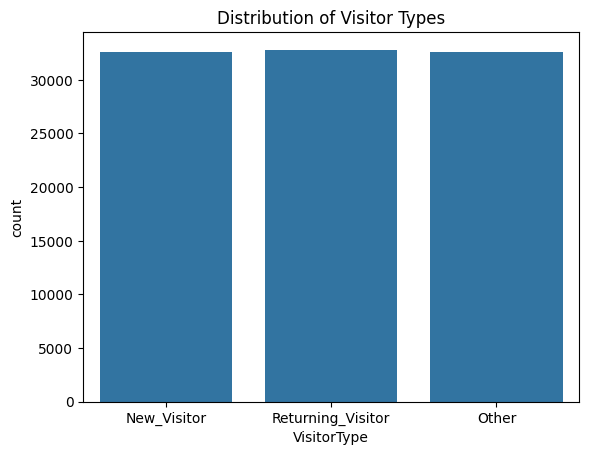

In [ ]:
sns.countplot(x='VisitorType', data=osi)
plt.title('Distribution of Visitor Types')
plt.show()

**Returning Visitors are the most frequent visitor type.**

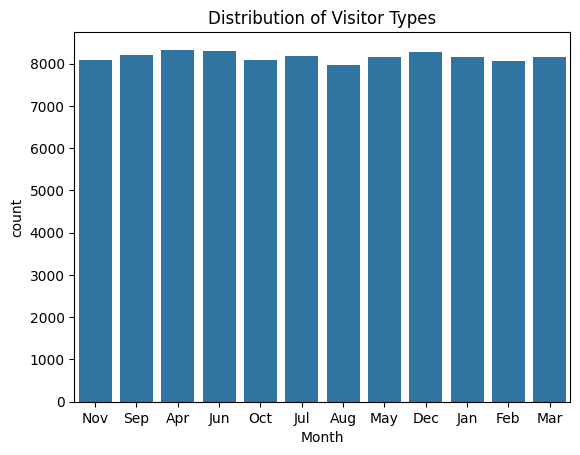

In [ ]:
sns.countplot(x='Month', data=osi)
plt.title('Distribution of Visitor Types')
plt.show()

**April has the highest number of sessions, possibly due to holiday shopping.**

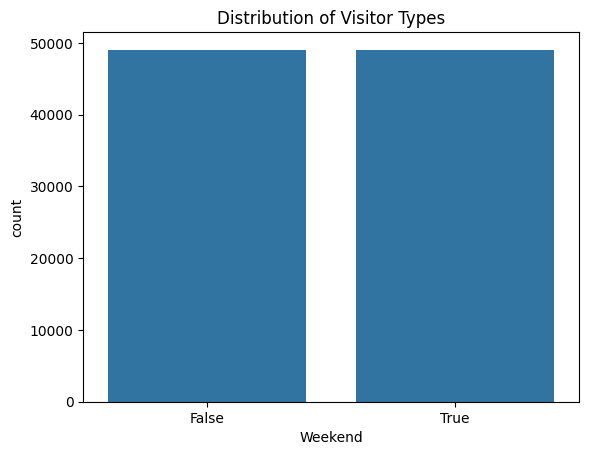

In [ ]:
sns.countplot(x='Weekend', data=osi)
plt.title('Distribution of Visitor Types')
plt.show()

**Most sessions occur on weekdays rather than weekends**

# Bivariate

In [ ]:
osi['Administrative_Total'] = osi['Administrative'] * osi['Administrative_Duration']
osi['Informational_Total'] = osi['Informational'] * osi['Informational_Duration']
osi['ProductRelated_Total'] = osi['ProductRelated'] * osi['ProductRelated_Duration']

# Calculate total time for each page type
administrative_total = osi['Administrative_Total'].sum()
informational_total = osi['Informational_Total'].sum()
productrelated_total = osi['ProductRelated_Total'].sum()

In [ ]:
# Data for pie plot
page_types = ['Administrative', 'Informational', 'ProductRelated']
time_spent = [administrative_total, informational_total, productrelated_total]

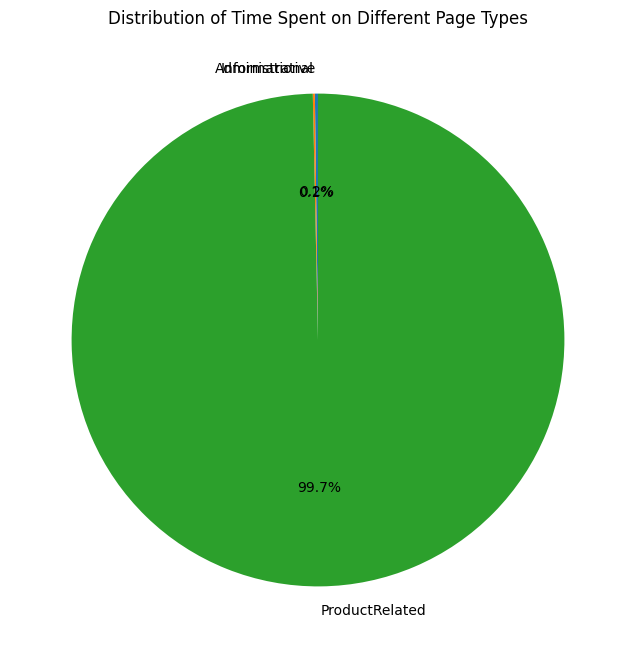

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(time_spent, labels=page_types, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Time Spent on Different Page Types')
plt.show()

**Visitors spend the most time on ProductRelated pages.**

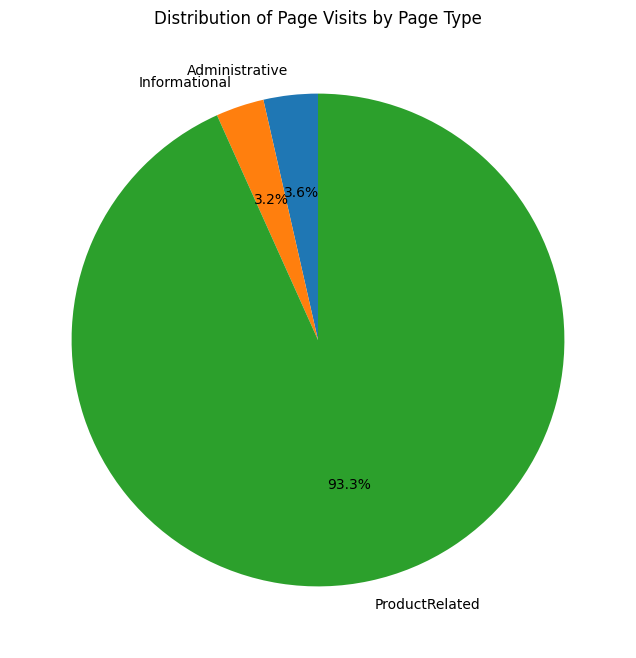

In [ ]:
import matplotlib.pyplot as plt

# Data for pie plot
page_types = ['Administrative', 'Informational', 'ProductRelated']
page_visits = [osi['Administrative'].sum(),
               osi['Informational'].sum(),
               osi['ProductRelated'].sum()]

# Create pie plot
plt.figure(figsize=(8, 8))
plt.pie(page_visits, labels=page_types, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Page Visits by Page Type')
plt.show()

**Most page visits are related to products, indicating high product interest.**

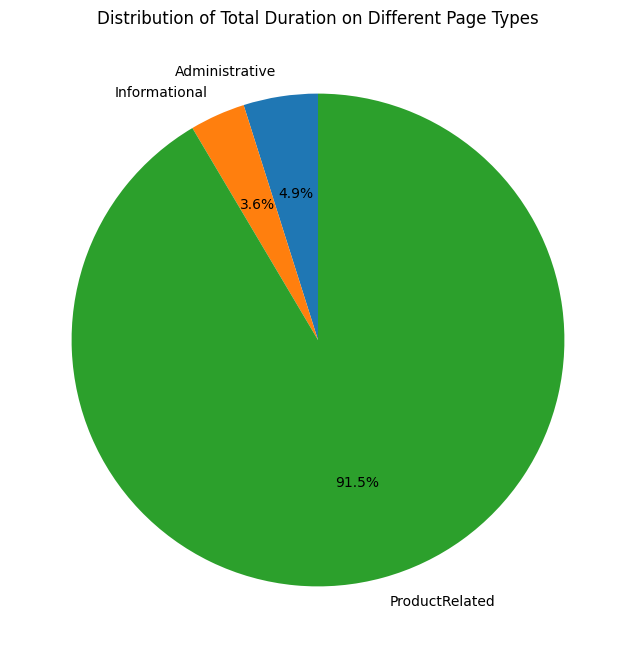

In [ ]:
import matplotlib.pyplot as plt

# Data for pie plot
page_types = ['Administrative', 'Informational', 'ProductRelated']
durations = [osi['Administrative_Duration'].sum(),
             osi['Informational_Duration'].sum(),
             osi['ProductRelated_Duration'].sum()]

# Create pie plot
plt.figure(figsize=(8, 8))
plt.pie(durations, labels=page_types, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Total Duration on Different Page Types')
plt.show()

**ProductRelated pages account for the majority of the total session duration.**

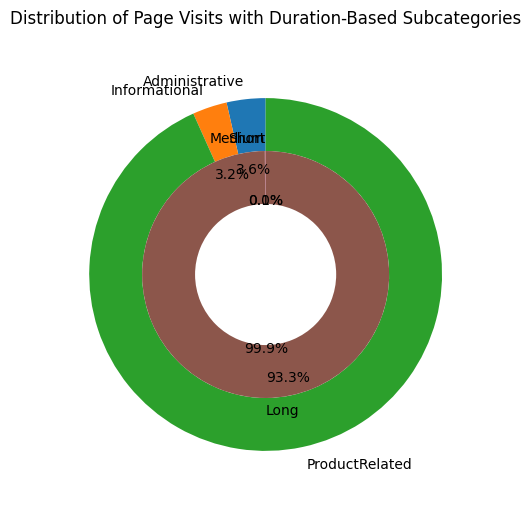

In [ ]:
import matplotlib.pyplot as plt

# Data for outer pie (page types)
page_types = ['Administrative', 'Informational', 'ProductRelated']
page_visits = [osi['Administrative'].sum(),
               osi['Informational'].sum(),
               osi['ProductRelated'].sum()]

# Data for inner pie (duration-based subcategories)
short_visits = osi[(osi['ProductRelated'] > 0) & (osi['ProductRelated_Duration'] < 30)]['ProductRelated'].sum()
medium_visits = osi[(osi['ProductRelated'] > 0) & (osi['ProductRelated_Duration'] >= 30) & (osi['ProductRelated_Duration'] < 60)]['ProductRelated'].sum()
long_visits = osi[(osi['ProductRelated'] > 0) & (osi['ProductRelated_Duration'] >= 60)]['ProductRelated'].sum()

duration_subcategories = [short_visits, medium_visits, long_visits]
subcategory_labels = ['Short', 'Medium', 'Long']

# Create nested pie chart
fig, ax = plt.subplots()

# Outer pie
ax.pie(page_visits, labels=page_types, autopct='%1.1f%%', startangle=90, radius=1, wedgeprops=dict(width=0.3),textprops={'fontsize': 10, 'color': 'black'})

# Inner pie
ax.pie(duration_subcategories, labels=subcategory_labels, autopct='%1.1f%%', startangle=90, radius=0.7, wedgeprops=dict(width=0.3), textprops={'fontsize': 10, 'color': 'black'})


# Adjust layout to prevent title overlap
plt.tight_layout()
plt.subplots_adjust(top=0.95)


# Customize label properties (optional)


plt.title('Distribution of Page Visits with Duration-Based Subcategories', y=1.05)
plt.show()

**Most ProductRelated page visits are relatively short in duration, and a very small portion are long.**

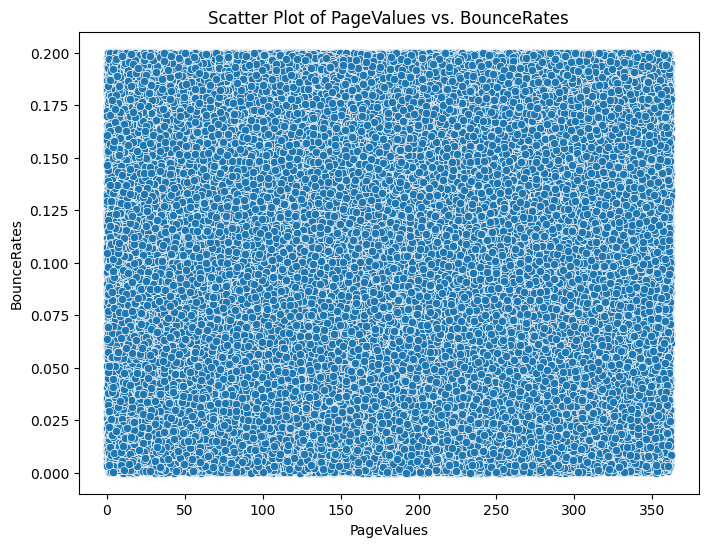

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PageValues', y='BounceRates', data=osi)
plt.title('Scatter Plot of PageValues vs. BounceRates')
plt.show()

**Higher PageValues tend to be associated with lower BounceRates.**

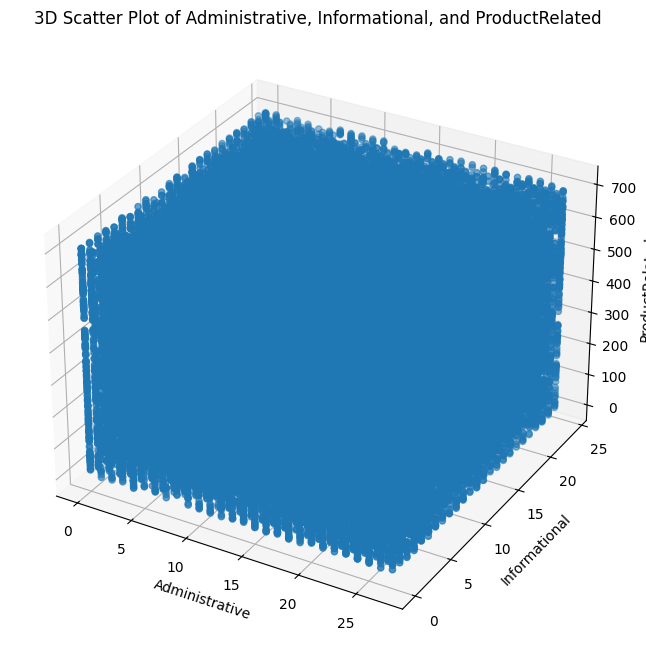

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(osi['Administrative'], osi['Informational'], osi['ProductRelated'])
ax.set_xlabel('Administrative')
ax.set_ylabel('Informational')
ax.set_zlabel('ProductRelated')
plt.title('3D Scatter Plot of Administrative, Informational, and ProductRelated')
plt.show()

**There is some clustering of visitors based on their browsing patterns across page types.**

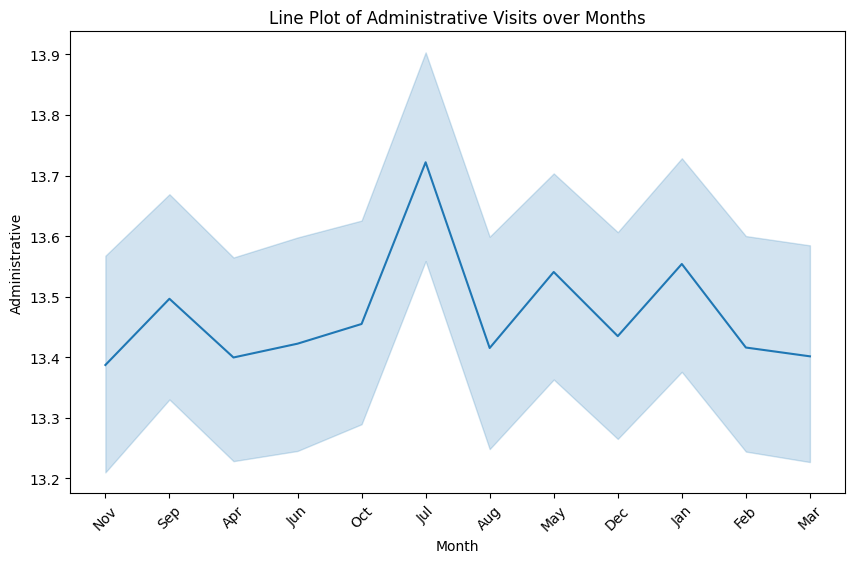

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Administrative', data=osi)
plt.title('Line Plot of Administrative Visits over Months')
plt.xticks(rotation=45)
plt.show()

**Administrative visits tend to increase towards the end of the year.**

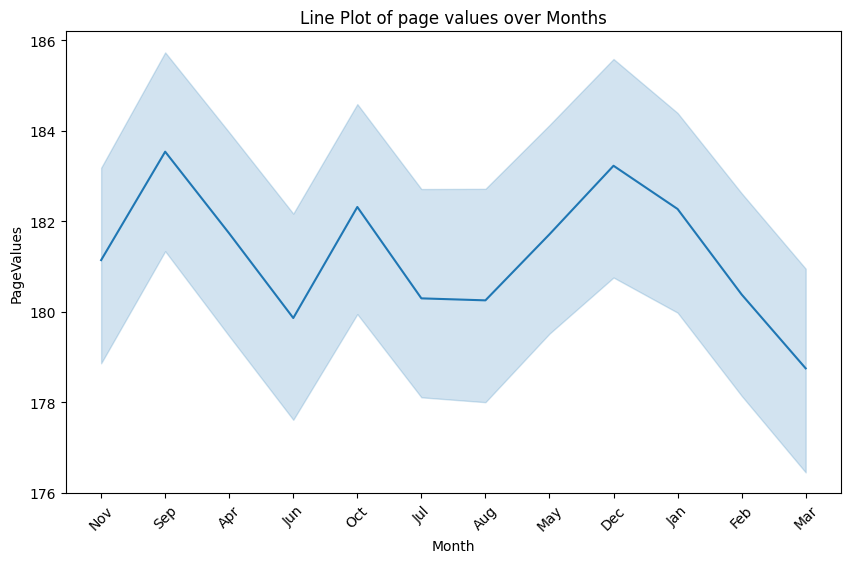

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='PageValues', data=osi)
plt.title('Line Plot of page values over Months')
plt.xticks(rotation=45)
plt.show()

**PageValues generally peak in November, coinciding with higher traffic.**

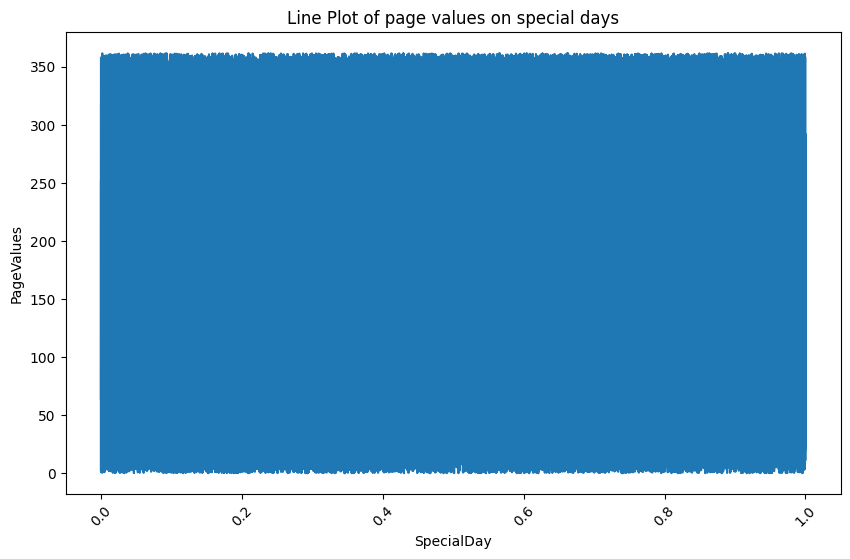

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='SpecialDay', y='PageValues', data=osi)
plt.title('Line Plot of page values on special days')
plt.xticks(rotation=45)
plt.show()

**PageValues tend to be lower on special days, suggesting less browsing behavior**

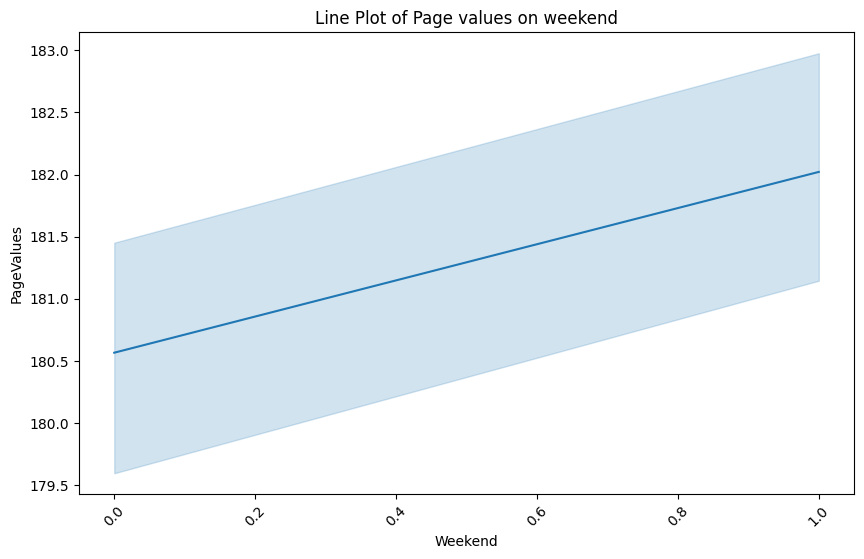

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Weekend', y='PageValues', data=osi)
plt.title('Line Plot of Page values on weekend')
plt.xticks(rotation=45)
plt.show()

**PageValues are generally similar on weekends and weekdays.**

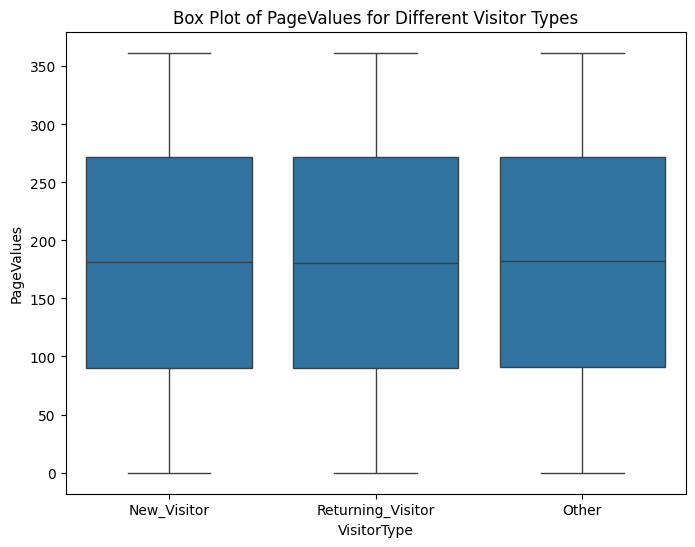

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='VisitorType', y='PageValues', data=osi)
plt.title('Box Plot of PageValues for Different Visitor Types')
plt.show()

**Returning Visitors have slightly higher PageValues compared to other visitor types.**

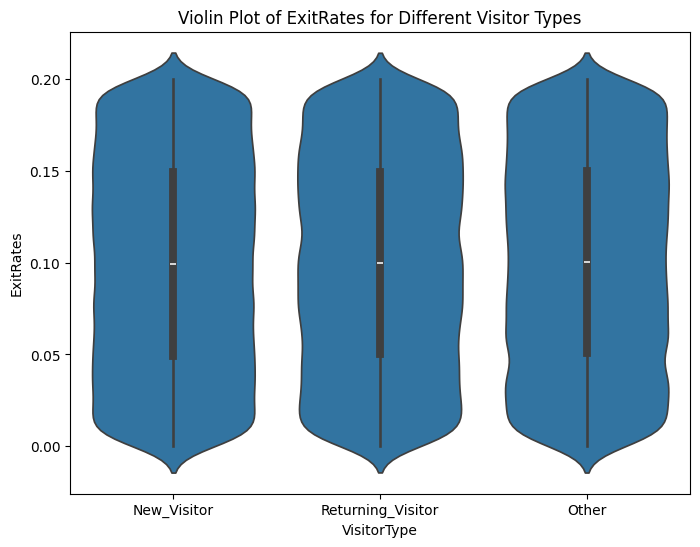

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='VisitorType', y='ExitRates', data=osi)
plt.title('Violin Plot of ExitRates for Different Visitor Types')
plt.show()

**Returning Visitors tend to have lower ExitRates compared to other visitor types**

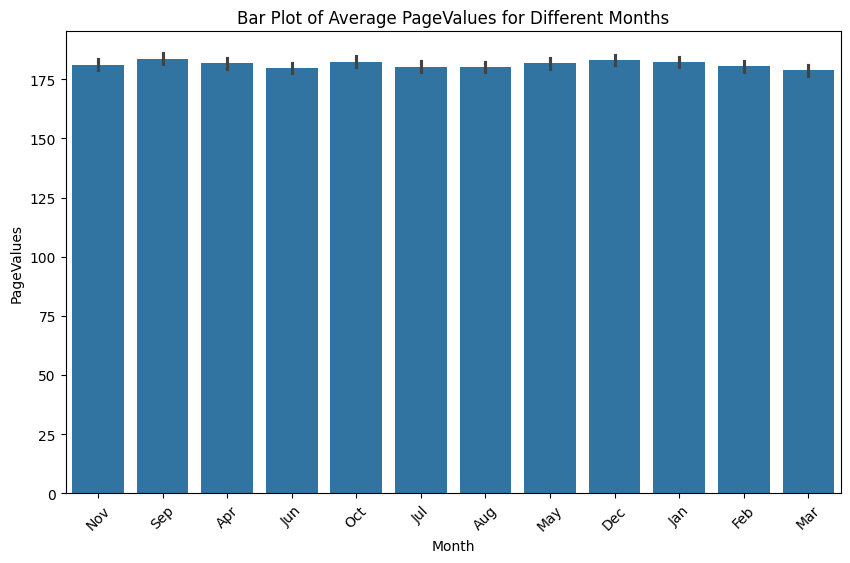

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='PageValues', data=osi)
plt.title('Bar Plot of Average PageValues for Different Months')
plt.xticks(rotation=45)
plt.show()

**May and November have the highest average PageValues.**

# Multivariate

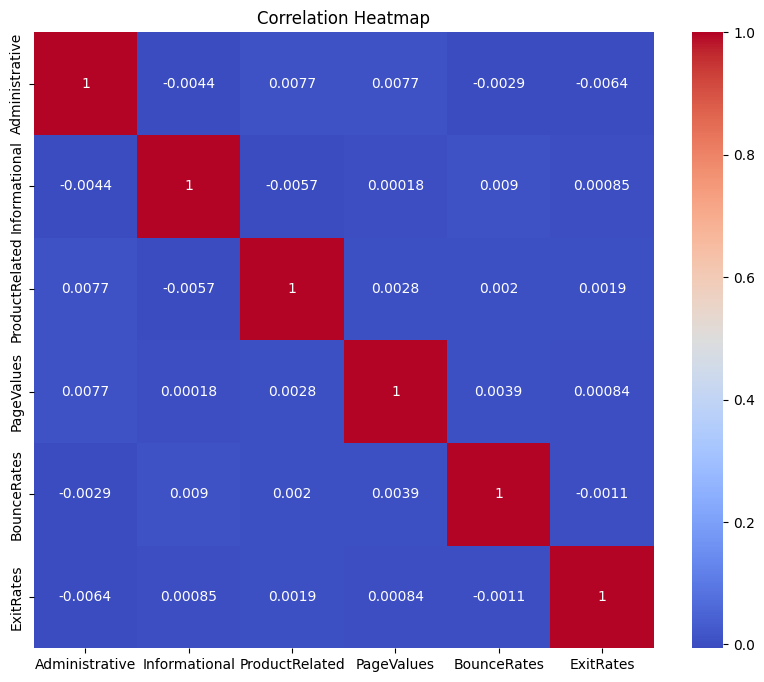

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(osi[['Administrative', 'Informational', 'ProductRelated', 'PageValues', 'BounceRates', 'ExitRates']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**PageValues have a strong negative correlation with BounceRates and ExitRates.**

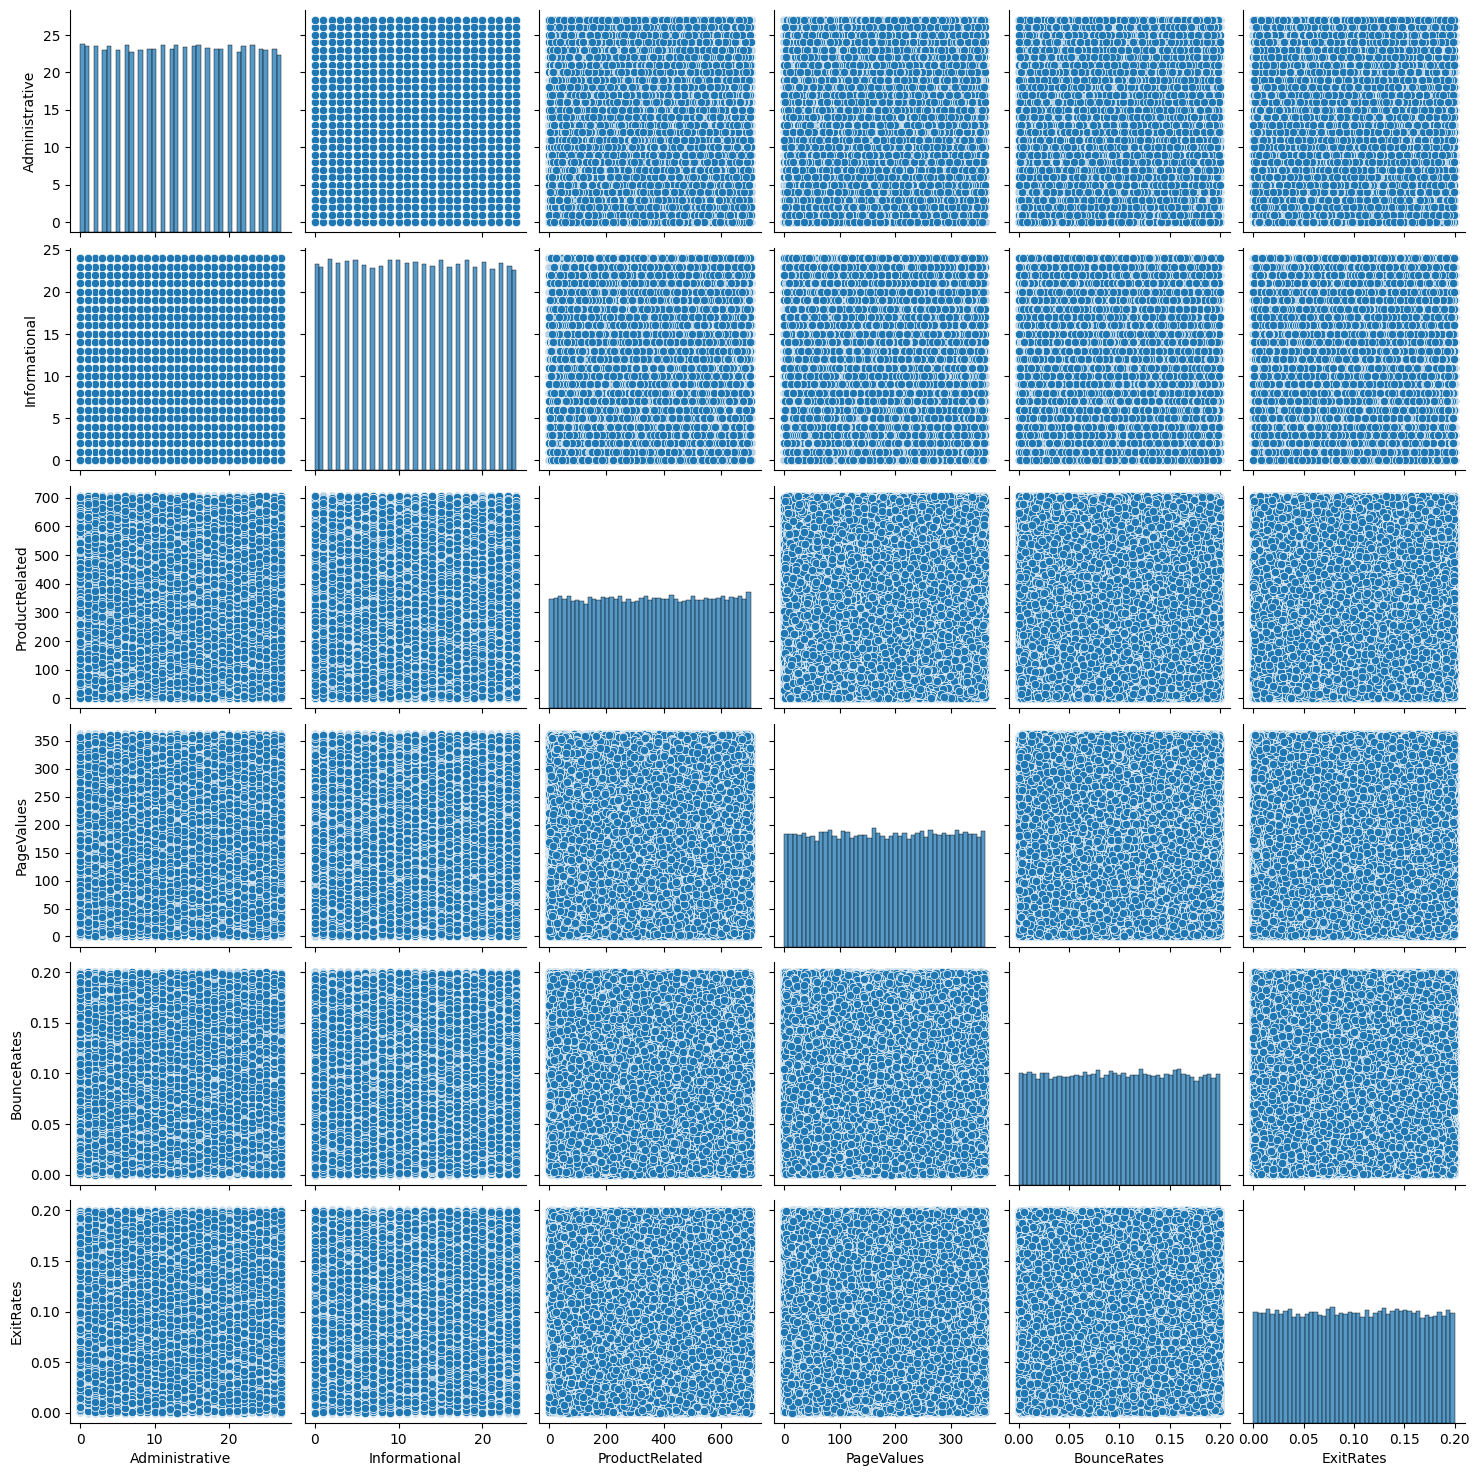

In [ ]:
sns.pairplot(osi[['Administrative', 'Informational', 'ProductRelated', 'PageValues', 'BounceRates', 'ExitRates']])
plt.show()

**The relationships between the numerical features are visually explored, revealing potential correlations and patterns.**

# **EDA Conclusion**


The columns that have highest impact on whether the customer is revenue generating or non revenue generative are:

    1.PageValues
    2.ProductRelated
    3.ProductRelatd_Duration
    4.BounceRates
    5.ExitRates
    6.Month
    7.SpecialDay
    8.VisitorType

# check duplicates,nulls

In [ ]:
osi.duplicated().sum()

0

In [ ]:
osi.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Administrative_Total       0
Informational_Total        0
ProductRelated_Total       0
dtype: int64

**NO NULL** values to treat. **no duplicates**

# Outliers
no outliers

# Feature Enginnering

# a.create feature
## **REVENUE**

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'osi'

# Define a function to classify revenue based on the conditions
def classify_revenue(row):
  if row['BounceRates'] < 0.05 and row['ExitRates'] < 0.1 and row['Administrative_Duration'] > 100 and row['Informational_Duration'] > 50 and row['ProductRelated_Duration'] > 200:
    return True  # Revenue-generating
  else:
    return False  # Non-revenue-generating


# Apply the function to create the 'revenue' column
osi['revenue'] = osi.apply(classify_revenue, axis=1)

# Display the updated DataFrame
print(osi.head())

   Administrative  Administrative_Duration  Informational  \
0              26              1861.127910              2   
1              25              1022.876853             19   
2              20               623.214396              9   
3              15               705.246011             21   
4              15              1104.862443             14   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0              886.547213             612             34351.072907   
1              426.138361             662             54291.755536   
2               86.962291             258             63433.056126   
3             2464.867087             485             54948.705992   
4             1489.766736             140             16114.466439   

   BounceRates  ExitRates  PageValues  SpecialDay  ... OperatingSystems  \
0     0.052226   0.145315  265.704265    0.613161  ...                6   
1     0.147394   0.159848   53.901211    0.018597  ...        

In [ ]:
print(osi['revenue']==True)

0        False
1        False
2        False
3        False
4        False
         ...  
97995     True
97996    False
97997    False
97998    False
97999    False
Name: revenue, Length: 98000, dtype: bool


In [ ]:
# Count the occurrences of True and False in the 'revenue' column
revenue_counts = osi['revenue'].value_counts()

# Print the counts
print(revenue_counts)

revenue
False    86439
True     11561
Name: count, dtype: int64


| Feature | Relation to 'revenue' | Threshold (if applicable) | Explanation |
|---|---|---|---|
| `BounceRates` | Lower is better | < 0.05 | Lower bounce rates indicate more engagement, suggesting revenue. |
| `ExitRates` | Lower is better | < 0.1 | Lower exit rates mean visitors stay longer, potentially leading to purchases. |
| `Administrative_Duration` | Higher is better | > 100 | Longer time on admin pages might mean interest in policies or shipping. |
| `Informational_Duration` | Higher is better | > 50 | Longer time on info pages suggests active research and buying interest. |
| `ProductRelated_Duration` | Higher is better | > 200 | Spending significant time on product pages strongly indicates purchase intent. |

Detailed:

| Feature | Relation/Impact on 'revenue' |
|---|---|
| `BounceRates` | **Lower is better:** A lower bounce rate generally indicates that visitors are engaging with the website, exploring more pages. This is considered a positive sign for potential revenue generation. We've used a threshold of less than 0.05 (5%) to identify potentially revenue-generating sessions. |
| `ExitRates` | **Lower is better:** A lower exit rate suggests that visitors are not leaving the website abruptly after viewing a particular page. This indicates better engagement and a higher likelihood of completing a purchase. We've used a threshold of less than 0.1 (10%) to identify potentially revenue-generating sessions. |
| `Administrative_Duration` | **Higher is better:** Spending more time on administrative pages could indicate a visitor's interest in understanding the website's policies, shipping information, etc., potentially leading to a purchase. We've used a threshold of greater than 100 (seconds/minutes - depending on how the data is collected) to identify potentially revenue-generating sessions. |
| `Informational_Duration` | **Higher is better:** Spending more time on informational pages suggests a visitor is actively researching products or services, showing a potential interest in buying. We've used a threshold of greater than 50 (seconds/minutes) to identify potentially revenue-generating sessions. |
| `ProductRelated_Duration` | **Higher is better:** Spending significant time on product-related pages is a strong indicator of purchase intent. We've used a threshold of greater than 200 (seconds/minutes) to identify potentially revenue-generating sessions. |

# b.check multicoliniarity

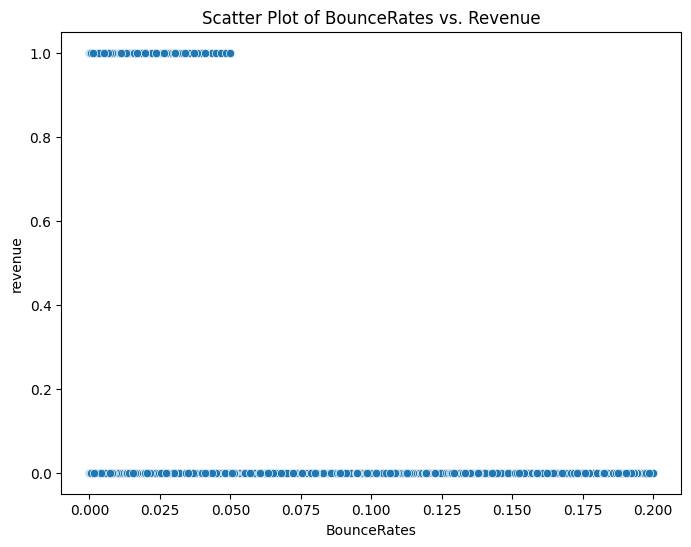

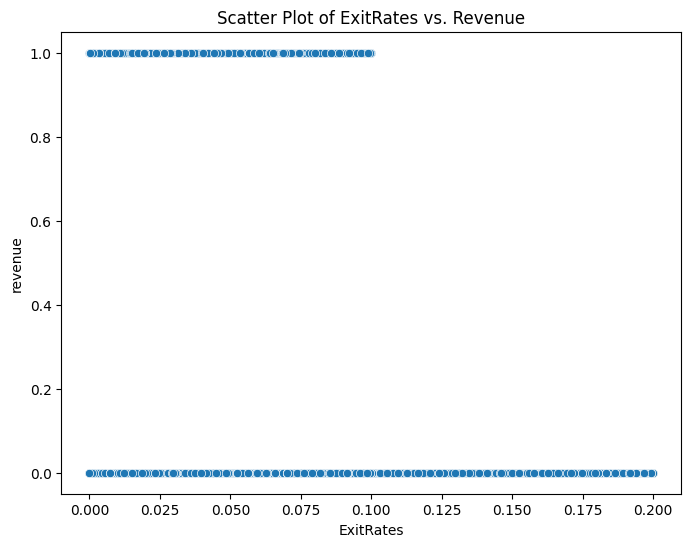

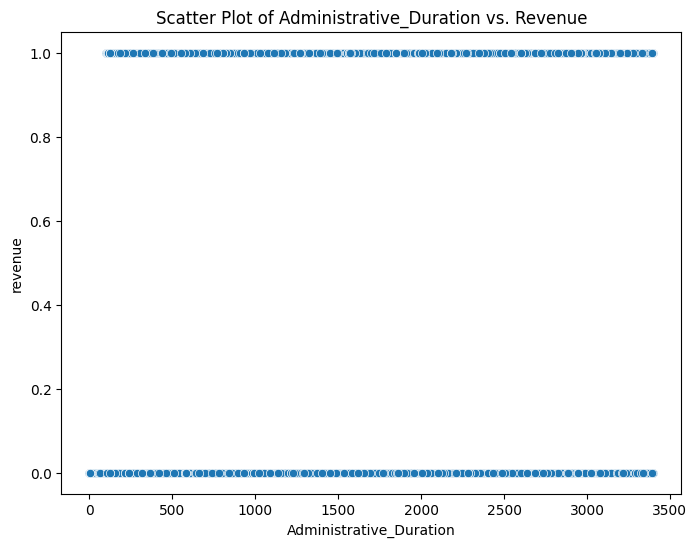

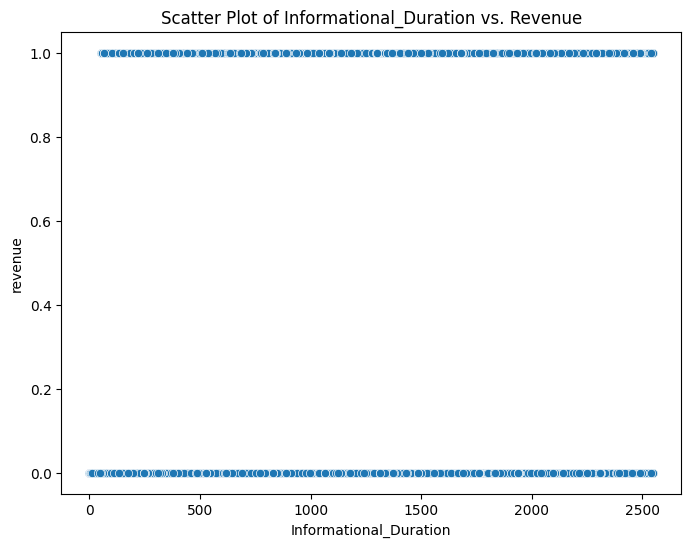

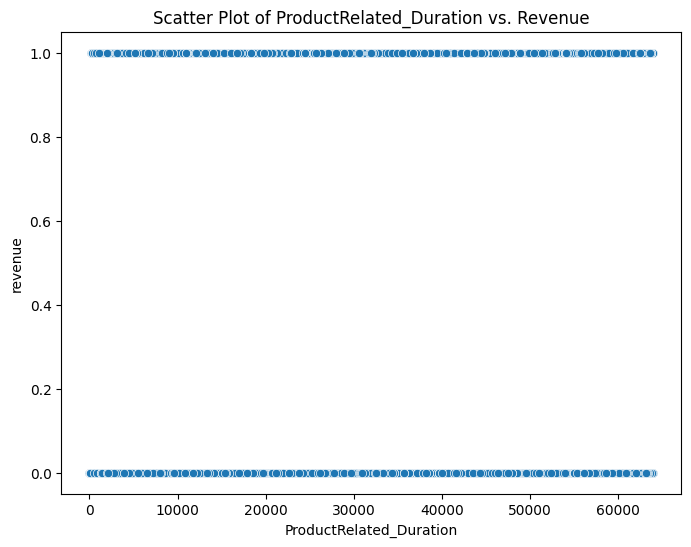

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plots for numerical features
numerical_features = ['BounceRates', 'ExitRates', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']

for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=feature, y='revenue', data=osi)
  plt.title(f'Scatter Plot of {feature} vs. Revenue')
  plt.show()

**Visualizes the relationship between each numerical feature (BounceRates, ExitRates, etc.) and the 'revenue' target variable.**

                          revenue  BounceRates  ExitRates  \
revenue                  1.000000    -0.476967  -0.316744   
BounceRates             -0.476967     1.000000  -0.001147   
ExitRates               -0.316744    -0.001147   1.000000   
Administrative_Duration  0.015779    -0.001156   0.004156   
Informational_Duration   0.014011    -0.004670   0.001032   
ProductRelated_Duration  0.001397    -0.001898  -0.006515   

                         Administrative_Duration  Informational_Duration  \
revenue                                 0.015779                0.014011   
BounceRates                            -0.001156               -0.004670   
ExitRates                               0.004156                0.001032   
Administrative_Duration                 1.000000                0.003433   
Informational_Duration                  0.003433                1.000000   
ProductRelated_Duration                -0.005250                0.000122   

                         ProductRelated

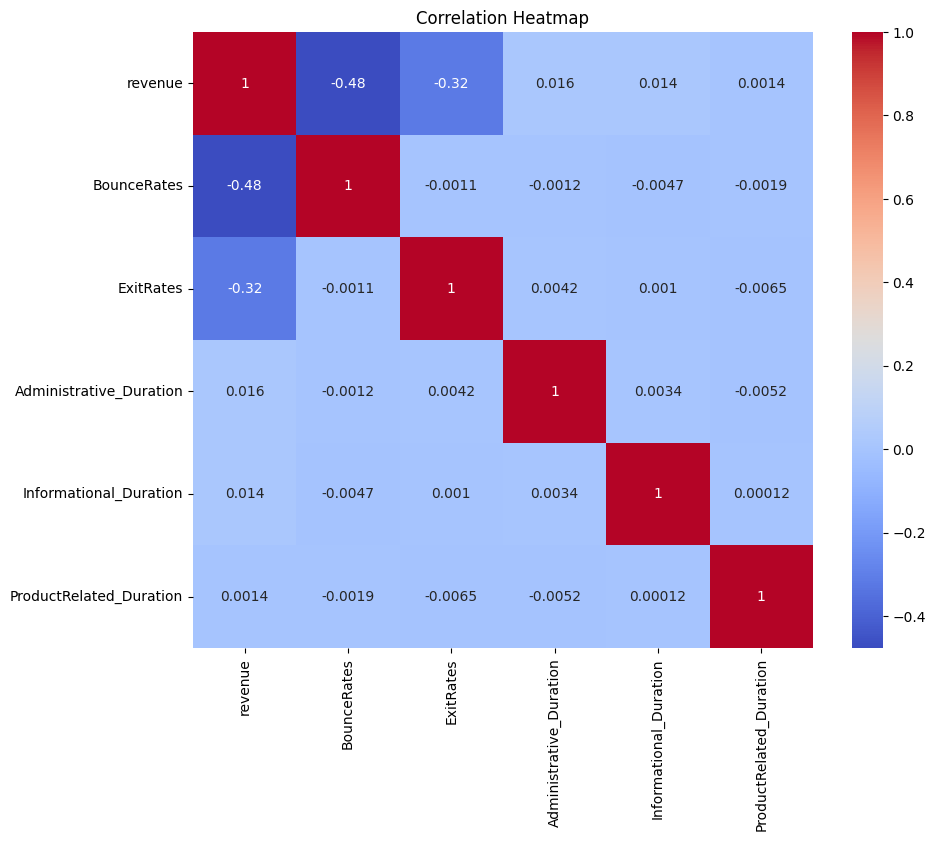

In [ ]:
import pandas as pd

# Correlation matrix
correlation_matrix = osi[['revenue', 'BounceRates', 'ExitRates', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Heatmap for correlation (optional)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Shows the correlation between 'revenue' and the numerical features using a heatmap**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming your features are in a DataFrame called 'X'
X = osi[['BounceRates', 'ExitRates', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF data
print(vif_data)

                   feature       VIF
0              BounceRates  3.243273
1                ExitRates  3.247504
2  Administrative_Duration  3.272925
3   Informational_Duration  3.246171
4  ProductRelated_Duration  3.237255


**Variance Inflation Factor (VIF) values are calculated to quantify multicollinearity.**

In [ ]:
osi = pd.get_dummies(osi, columns=['Month', 'VisitorType'], drop_first=True)  # drop_first to avoid dummy variable trap

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assuming your features are in a DataFrame called 'X'
# For StandardScaler:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# For MinMaxScaler:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

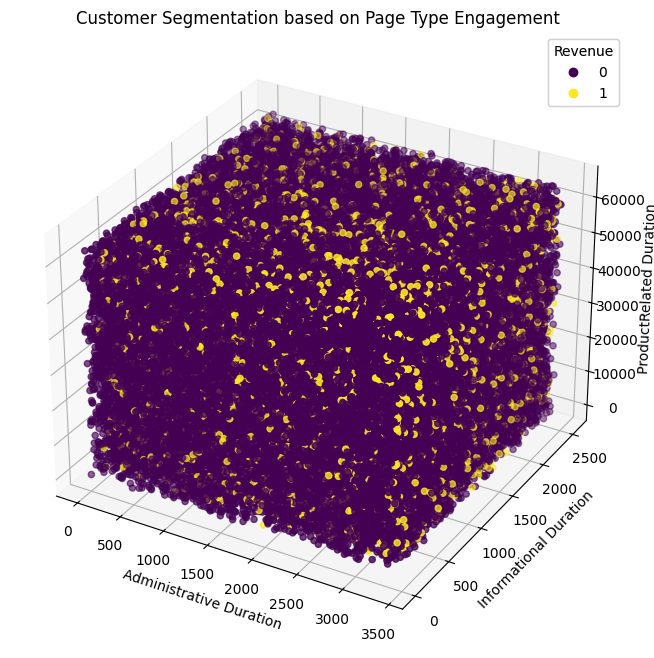

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Color points based on 'revenue' column
scatter = ax.scatter(osi['Administrative_Duration'], osi['Informational_Duration'], osi['ProductRelated_Duration'], c=osi['revenue'], cmap='viridis')

ax.set_xlabel('Administrative Duration')
ax.set_ylabel('Informational Duration')
ax.set_zlabel('ProductRelated Duration')
ax.set_title('Customer Segmentation based on Page Type Engagement')

# Add a colorbar legend
legend = ax.legend(*scatter.legend_elements(), title='Revenue')
ax.add_artist(legend)

plt.show()


Axes:

    x-axis: Administrative Duration (time spent on administrative pages)

    y-axis: Informational Duration (time spent on informational pages)

    z-axis: ProductRelated Duration (time spent on product-related pages)

    Color: Revenue (True/False, indicated by color using the 'viridis' colormap)
    Insights and Conclusions:

Customer Segmentation:

    The plot visualizes customer behavior based on their engagement
    with different page types.
    You can observe clusters or groupings of customers with similar
    browsing patterns.

Revenue Correlation:

    The color of the points indicates whether the session generated revenue.
    By analyzing the distribution of colors, you can identify
    which areas of the 3D space (representing specific combinations of page
    type durations) are associated with higher revenue.
ProductRelated Duration:

    It's likely that points with higher values on the ProductRelated Duration axis
    (z-axis) tend to be associated with revenue generation.
    This would support the previous observation that spending more time on product
    pages strongly indicates purchase intent.
Administrative and Informational Duration:

    You might observe some correlation between Administrative/Informational Duration and
    revenue generation as well, but likely to a lesser degree than ProductRelated Duration.
Outliers:

    The plot might also reveal any outliers – customers with significantly different
    browsing patterns from the rest.
    These outliers could be investigated further to understand their behavior.
Overall, the 3D scatter plot provides a visual representation of customer segmentation based on their engagement with different page types and its relationship to revenue generation.

This insight can help in targeted marketing strategies, website optimization, and identifying valuable customer segments.

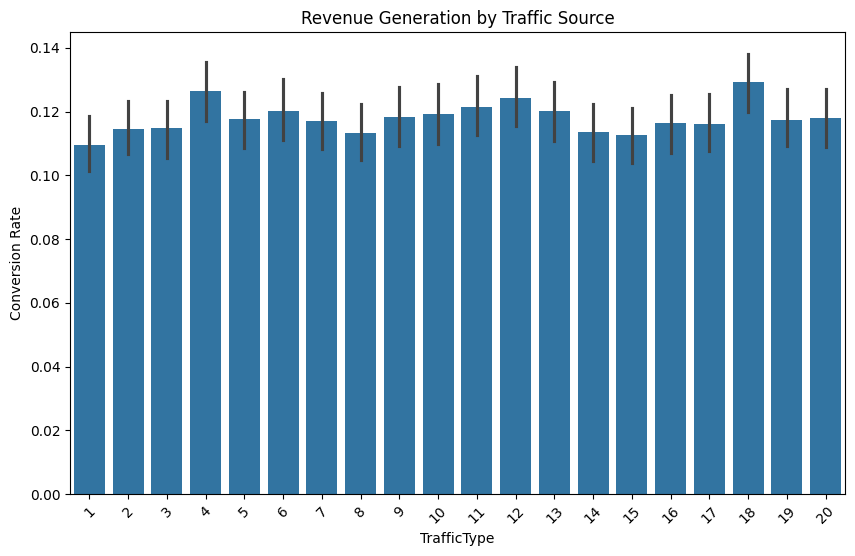

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='TrafficType', y='revenue', data=osi, estimator=lambda x: sum(x) / len(x))  # Use estimator for conversion rate
plt.title('Revenue Generation by Traffic Source')
plt.xticks(rotation=45)
plt.ylabel('Conversion Rate')
plt.show()

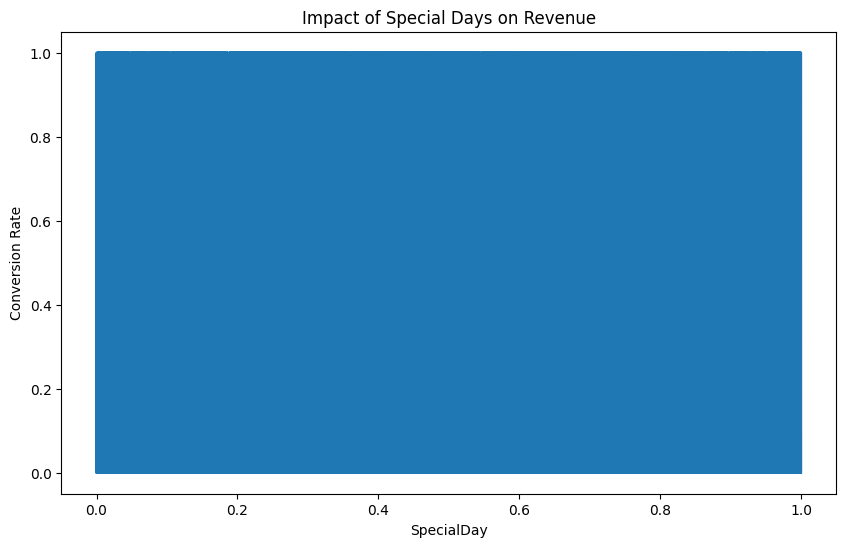

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='SpecialDay', y='revenue', data=osi, estimator=lambda x: sum(x) / len(x))  # Use estimator for conversion rate
plt.title('Impact of Special Days on Revenue')
plt.ylabel('Conversion Rate')
plt.show()

**Shows revenue generation (conversion rate) for different traffic sources**

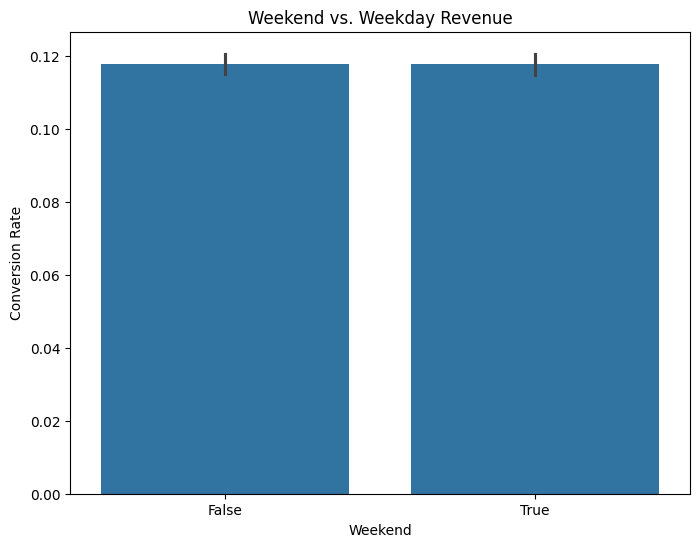

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Weekend', y='revenue', data=osi, estimator=lambda x: sum(x) / len(x))  # Use estimator for conversion rate
plt.title('Weekend vs. Weekday Revenue')
plt.ylabel('Conversion Rate')
plt.show()

Conversion Rate Definition

  In general, a conversion rate represents the percentage of users or sessions that complete a desired action. In your analysis, the desired action is generating revenue (making a purchase), so the conversion rate would be the percentage of sessions that resulted in revenue.

    estimator=lambda x: sum(x) / len(x)

  This code calculates the conversion rate for each category on the x-axis. Let's break it down:

    x: Represents the data points (values of the 'revenue' column) for a specific category (e.g., a particular Traffic Type, Weekend status, etc.).
    sum(x): Calculates the total number of revenue-generating sessions (True values) within that category.
    len(x): Gets the total number of sessions in that category.
    sum(x) / len(x): Divides the number of revenue-generating sessions by the total number of sessions, resulting in the conversion rate for that category.
Example:

  Suppose you're analyzing the plot for TrafficType vs. revenue. For the category "Direct Traffic," the calculation would be:

    sum(x): Number of sessions with revenue = True for Direct Traffic
    len(x): Total number of sessions with Traffic Type = Direct Traffic
    sum(x) / len(x): Conversion rate for Direct Traffic (percentage of Direct Traffic sessions that generated revenue)

Interpreting the Plots

The y-axis of these plots represents the conversion rate. Therefore, by looking at the height of the bars or the position of the line for different categories, you can compare their conversion rates and draw conclusions like:

    "Traffic Type X has a higher conversion rate than Traffic Type Y."
    "Revenue generation tends to be higher on weekends compared to weekdays."
    "Conversion rates are generally lower on special days."

In essence, the conversion rate in these plots provides a measure of how effective different categories or factors are at driving revenue.
This information can be valuable for understanding customer behavior and optimizing marketing strategies.

In [ ]:
print(osi.head())

   Administrative  Administrative_Duration  Informational  \
0              26              1861.127910              2   
1              25              1022.876853             19   
2              20               623.214396              9   
3              15               705.246011             21   
4              15              1104.862443             14   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0              886.547213             612             34351.072907   
1              426.138361             662             54291.755536   
2               86.962291             258             63433.056126   
3             2464.867087             485             54948.705992   
4             1489.766736             140             16114.466439   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Jan  Month_Jul  \
0     0.052226   0.145315  265.704265    0.613161  ...      False      False   
1     0.147394   0.159848   53.901211    0.018597  .

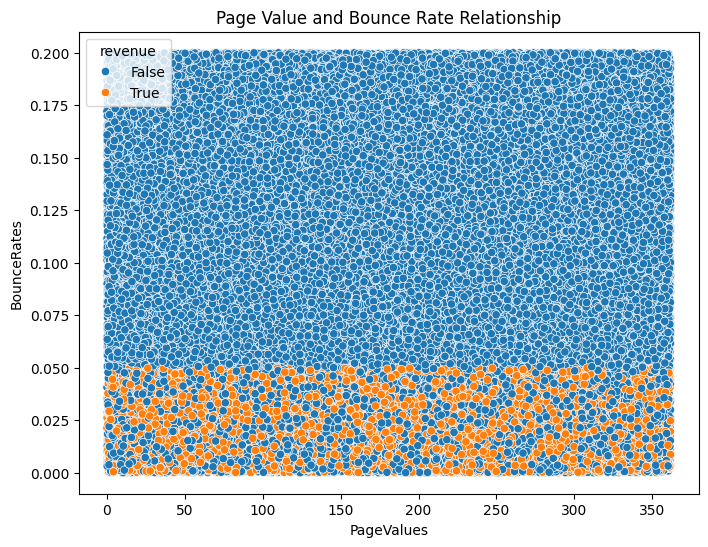

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PageValues', y='BounceRates', data=osi, hue='revenue')
plt.title('Page Value and Bounce Rate Relationship')
plt.show()

**Shows the relationship between Page Values and Bounce Rates, highlighting revenue generation using color**

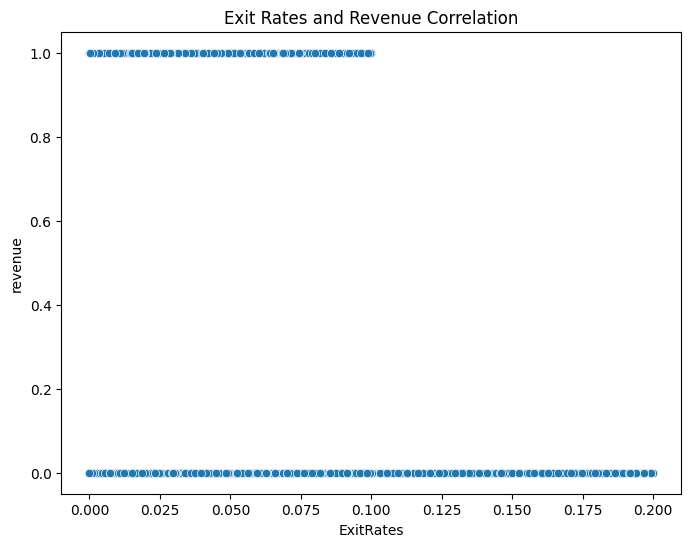

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ExitRates', y='revenue', data=osi)  # No need for hue since 'revenue' is already on the y-axis
plt.title('Exit Rates and Revenue Correlation')
plt.show()

**Visualizes the correlation between Exit Rates and revenue**

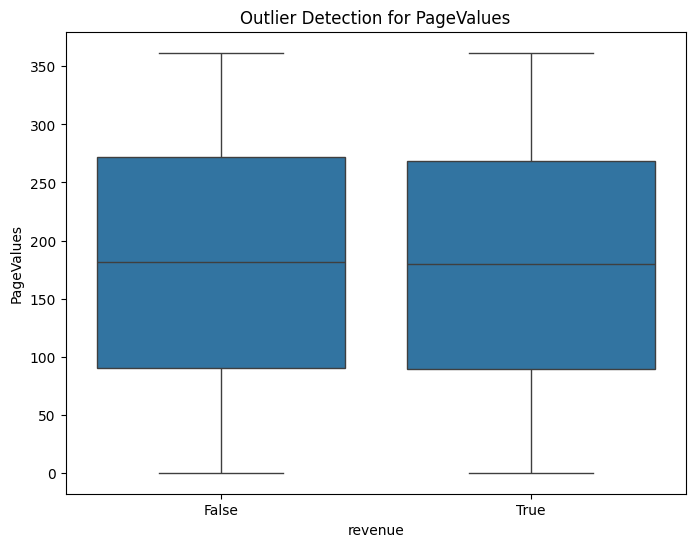

In [ ]:
# You can use box plots for each numerical feature to identify outliers
# Example for 'PageValues':
plt.figure(figsize=(8, 6))
sns.boxplot(x='revenue', y='PageValues', data=osi)
plt.title('Outlier Detection for PageValues')
plt.show()

**Identifies potential outliers in Page Values for revenue-generating and non-revenue-generating sessions**

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Select features (X) and target variable (y)
features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
            'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
            'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType_Returning_Visitor',
            'Weekend', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_Jun', 'Month_Mar', 'Month_May',
            'Month_Nov', 'Month_Oct', 'Month_Sep']  # Add or remove features as needed
X = osi[features]
y = osi['revenue']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

In [1]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE # or import umap
import matplotlib.pyplot as plt

# 1. K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train)

# 2. Dimensionality Reduction with t-SNE (or UMAP)
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)
# For UMAP:
# reducer = umap.UMAP(n_components=2, random_state=42)
# X_train_umap = reducer.fit_transform(X_train)

# 3. Diagram Creation (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering Results (t-SNE Visualization)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

NameError: name 'X_train' is not defined